# Welcome to Jupyter!

In [21]:
import scipy as sp
import numpy as np

#theta is inclination, phi is azimuth
#This block can kinda be ignored, just run this if theres any other necessary conversions to be done. 

def Polar_to_Cart(r, theta, phi):
    cartesian = np.array([r * np.sin(theta) * np.cos(phi), r * np.sin(theta) * np.sin(phi), r * np.cos(theta)])
    return cartesian

def Axial_To_Orbital(periapsis, longitude, inclination):
    x1 = np.cos(longitude) * np.cos(periapsis) - np.sin(longitude) * np.cos(inclination) * np.sin(periapsis)
    x2 = np.sin(longitude) * np.sin(periapsis) + np.cos(longitude) * np.cos(inclination) * np.sin(periapsis)
    x3 = np.sin(inclination) * np.sin(periapsis)
    y1 = -np.cos(longitude) * np.sin(periapsis) - np.sin(longitude) * np.cos(inclination) * np.cos(periapsis)
    y2 = -np.sin(longitude) * np.sin(periapsis) + np.cos(longitude) * np.cos(inclination) * np.cos(periapsis)
    y3 = np.sin(inclination) * np.cos(periapsis)
    z1 = np.sin(inclination) * np.sin(longitude)
    z2 = -np.sin(inclination) * np.cos(periapsis)
    z3 = np.cos(inclination)
    
    return(np.array(sum(x1, x2, x3),sum(y1, y2, y3), sum(z1, z2, z3)))



In [22]:
#Dont forget to unpack the Orbital Elements
import numpy as np
import math
import matplotlib.pyplot as plt

#This function takes these in these units - 'meters, unitless, radians from Periapsis to Mean_Anomaly, Julian Days, Kilograms, Iterations N'

def Keplerian_to_Cartesian(Semimajor_Axis, Eccentricity, Periapsis, Longitude, Inclination, Mean_Anomaly, Considered_Epoch, Mass, Iterations):
    Gravitational_Constant = 6.67408e-11
    Gravitational_Param = Mass * Gravitational_Constant
    
    if Considered_Epoch == Mean_Anomaly:
        Mt = Mean_Anomaly
    else:
        deltat = 86400 * (Considered_Epoch - Mean_Anomaly)
        Mt = (Mean_Anomaly + deltat * np.sqrt(Gravitational_Param / Semimajor_Axis **3)) % (2 * np.pi)
        #Normalized to 2*pi
        
        
        
    E = np.zeros(Iterations)
    F = np.zeros(Iterations)
    V = np.zeros(Iterations)
    
    E[0] = Mt 
    F[0] = E[0] - Eccentricity * np.sin(E[0]) - Mt
    
    for t in range(1, Iterations):
        E[t] = (F[t-1] / (1 - Eccentricity * np.cos(math.radians(E[t-1]))))
        F[t] = E[t] - Eccentricity * np.sin(math.radians(E[t])) - Mt
        
        
    for t in range(0, Iterations):
        V[t] = 2 * math.atan2(np.sqrt(1 + Eccentricity) * np.sin(math.radians(E[t]/2)),np.sqrt(1-Eccentricity) * np.cos(math.radians(E[t]/2)))
    
    #Get distance to central body
    R_c = np.zeros(Iterations)
    for t in range(0, Iterations):
        R_c[t] = Semimajor_Axis * (1 - Eccentricity * np.cos(E[t]))
    
    O = np.zeros((Iterations,3))
    O_Prime = np.zeros((Iterations,3))
    
    for t in range(0, Iterations):
        O_temp = np.array( [R_c[t] * np.cos(math.radians(V[t])),  R_c[t] * np.sin(math.radians(V[t])),  0])
        O[t] = O_temp
        
        O_Prime_Temp = np.array([(np.sqrt(Gravitational_Param * Semimajor_Axis) / R_c[t]) * -np.sin(math.radians(E[Iterations - 1])), (np.sqrt(Gravitational_Param * Semimajor_Axis) / R_c[t]) * np.sqrt(1 - Eccentricity ** 2) * np.cos(math.radians(E[Iterations - 1])), 0])
        O_Prime[t] = O_Prime_Temp
    
    Longitude1 = math.radians(Longitude)
    Periapsis1 = math.radians(Periapsis)
    Inclination1 = math.radians(Inclination)
    
    x1 = np.cos(Longitude1) * np.cos(Periapsis1) - np.sin(Longitude1) * np.cos(Inclination1) * np.sin(Periapsis1)
    x2 = np.cos(Longitude1) * np.sin(Periapsis1) - np.sin(Longitude1) * np.cos(Inclination1) * np.cos(Periapsis1)
    y1 = np.cos(Periapsis1) * np.sin(Longitude1) + np.sin(Periapsis1) * np.cos(Inclination1) * np.cos(Longitude1)
    y2 = np.cos(Periapsis1) * np.cos(Inclination1) * np.cos(Longitude1) - np.sin(Periapsis1) * np.sin(Longitude1)
    z1 = np.sin(Periapsis1) * np.sin(Inclination1)
    z2 = np.cos(Periapsis1) * np.sin(Inclination1)
    #Longitude = Omega
    #Periapsis = Small Omega
    #Inclination = i
    AU_Constant = 1.49597870691 * (10**11)
    AU_d_Constant = 86400 * AU_Constant

    
    R = np.zeros((Iterations,3))
    R_Prime = np.zeros((Iterations,3))
    for t in range(0, Iterations):
        R[t] = np.array([((O[t][0] * x1 - O[t][1] * x2)) ,((O[t][0] * y1 + O[t][1] * y2)), ((O[t][0] * z1 + O[t][1] * z2)) ])
        R_Prime[t] = np.array([((O_Prime[t][0] * x1 - O_Prime[t][1] * x2)) ,((O_Prime[t][0] * y1 + O_Prime[t][1] * y2)), ((O_Prime[t][0] * z1 + O_Prime[t][1] * z2))  ])
        
    return R, R_Prime
        

In [30]:
#Semimajor_Axis, Eccentricity, Periapsis, Longitude, Inclination, Mean_Anomaly, Considered_Epoch, Mass, Iterations
a, b = Keplerian_to_Cartesian(6780000, 0.0000829, 297.7927, 212.4172, 51.6416, 185.9201, 2458609.188196, 5.972e24, 300)

#a is position vectors in cartesian, b is velocity
print(a)
print(b)


[[-4671551.23979031  1441734.86118959 -4700559.24343321]
 [-4663678.39745011  1447261.41573565 -4702798.87755222]
 [-4657151.4796036   1453206.41961168 -4706396.71441899]
 [-4649604.39278731  1458834.31654072 -4708965.15834923]
 [-4642217.720194    1464512.30329622 -4711695.75687295]
 [-4635583.62600293  1470429.04449252 -4715191.9002174 ]
 [-4627639.34456569  1475930.54877567 -4717355.8167135 ]
 [-4620880.02097253  1481810.11055397 -4720727.82905027]
 [-4613631.03101129  1487533.95983281 -4723601.27028059]
 [-4605908.77682556  1493104.81805782 -4725989.65511439]
 [-4599358.3283342   1499056.32498887 -4729581.39531933]
 [-4591505.20180828  1504583.75631879 -4731834.2163846 ]
 [-4584406.98369689  1510358.04701868 -4734864.35958614]
 [-4577456.73101767  1516182.10366213 -4738048.62439035]
 [-4569510.30439322  1521675.6458576  -4740201.05912418]
 [-4562882.00121045  1527608.07980957 -4743720.78890555]
 [-4555255.97817586  1533206.92829835 -4746203.82028606]
 [-4547784.66174356  1538856.70

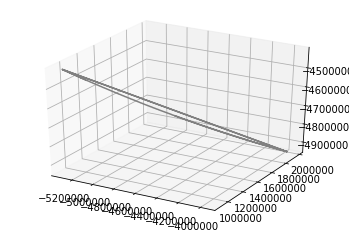

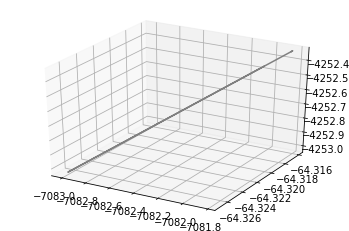

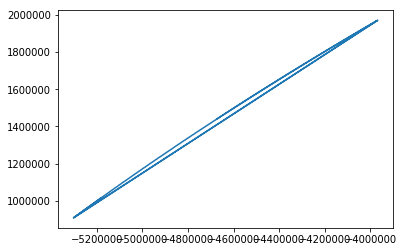

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(a[::,0], a[::,1], a[::,2], 'gray')

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot3D(b[::,0], b[::,1], b[::,2], 'gray')

fig3 = plt.figure()
ax3 = plt.axes()
ax3.plot(a[::,0], a[::,1])
